# Продвинутая визуализация данных. Домашнее задание 5 (vo_HW)

##### Цель задания. В этом модуле мы будем заниматься практическим использованием методов понижения размерности. В этот раз в качестве зависимой переменной мы будем использовать переменную type — к какому типу относится наше вино.

##### План работы:
EDA.
Поиск корреляций.
Сохранение доли объясненной дисперсии.
Сравнение результатов работы разных алгоритмов понижения размерности.
Сравнение результатов работы алгоритмов анализа данных до и после понижения размерности.
Поиск аномалий в работе алгоритмов.

##### Обзор данных
Содержание. Этот набор данных содержит информацию о трех разных типах вина и ряд их характеристик.

Всего в датасете 13 характеристик: Alcohol, Malic, Ash, Alcalinity, Magnesium, Phenols, Flavanoids, Nonflavanoids, Proanthocyanins, Color, Hue, Dilution, Proline.

Мы будем работать с этим датасетом, используя алгоритмы понижения размерности и машинного обучения.

Давайте импортируем основные библиотеки, которые могут нам понадобиться в рамках работы над датасетом:

In [77]:
pip install catboost


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [78]:
pip install opentsne


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [79]:
pip install umap-learn


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [80]:
pip install lightgbm


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [81]:
pip install catboost


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [82]:
# Data manipulation
import pandas as pd
pd.set_option("display.max_columns", None)
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import plotly.express as px

# Data preprocessing
from sklearn.model_selection import train_test_split as tts

# Dimensionality Reduction
from openTSNE.sklearn import TSNE
import umap
from sklearn.decomposition import PCA

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, roc_auc_score

# tqdm
from tqdm.auto import tqdm

# warnings
import warnings
warnings.filterwarnings('ignore')

In [83]:
df = pd.read_csv('https://raw.githubusercontent.com/ElijahSum/mipt_visualization/master/week_05_visualization/wine.csv')
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [84]:
df.shape

(178, 14)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


#### Задание 1. Разведочный анализ данных (2 балла)
Воспользуйтесь графиком sns.displot() и постройте 13 графиков распределения разных переменных на одном поле subplots. Параметр hue возьмите равным Type.

Напишите, какие выводы о различиях в типах вин можно сделать исходя из этих графиков.

Критерии оценивания:
Построены графики — 1 балл.
Сделаны выводы о различиях в типах вин — 1 балл.

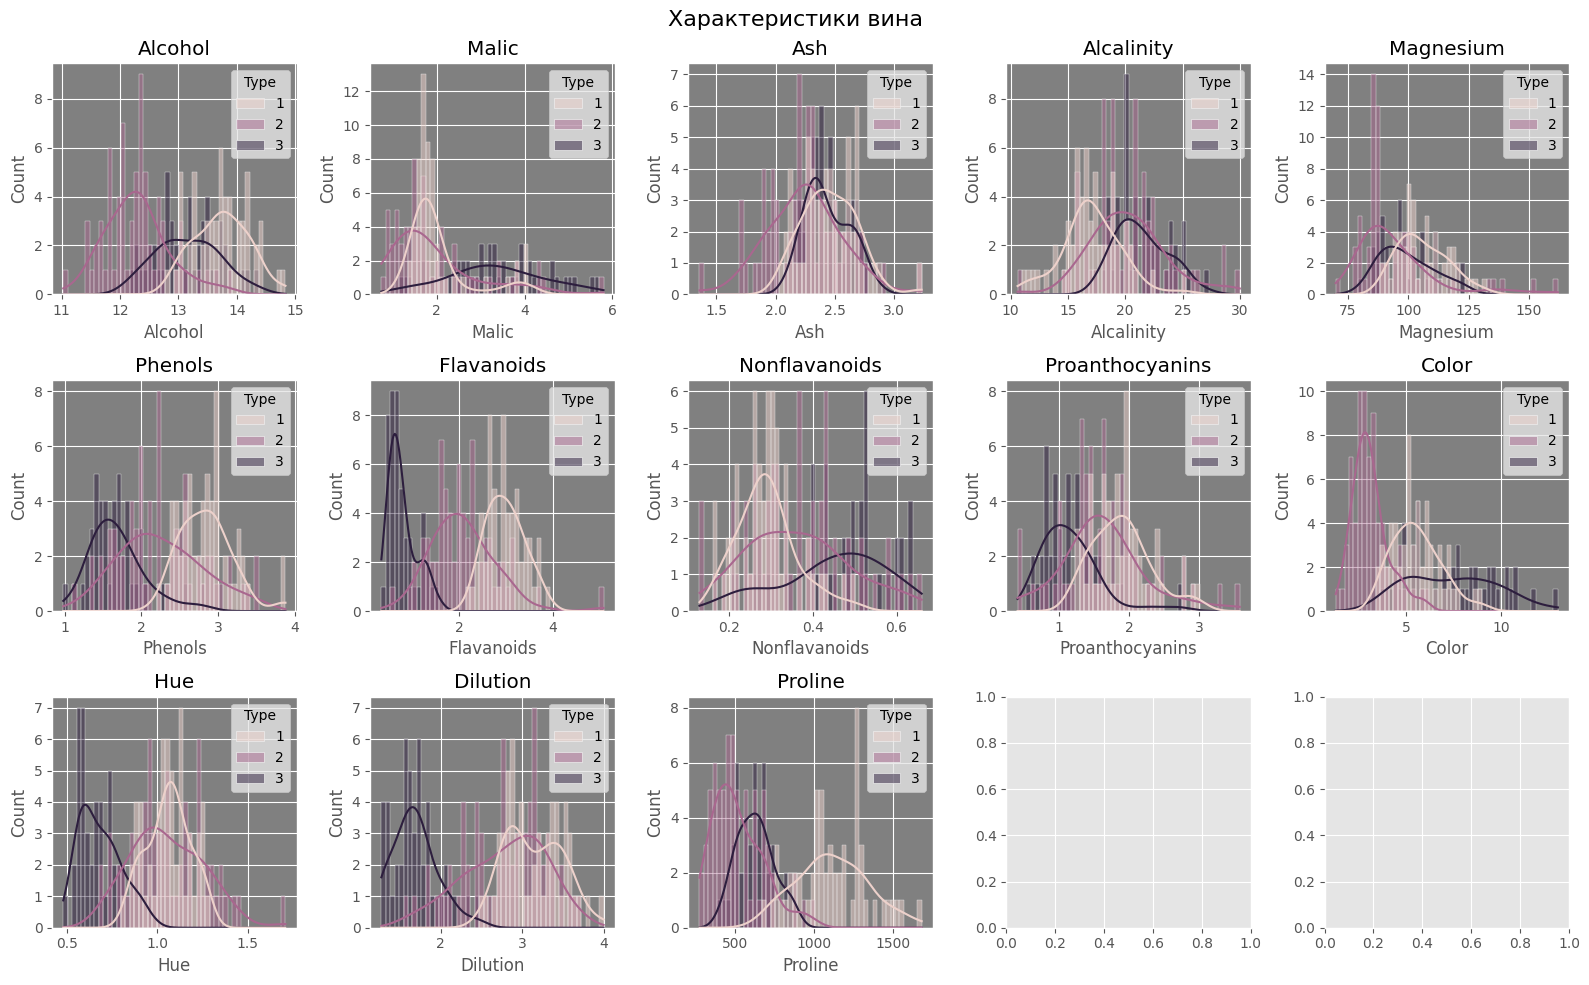

In [86]:
fig, axes = plt.subplots(3, 5, figsize=(16, 10))
fig.suptitle('Характеристики вина', fontsize=16)
axes = axes.flatten()
#axes.set_facecolor("gray")

for i, el in enumerate(df.iloc[:, 1:].columns):
    sns.histplot(df[1:], x=el, bins=50, hue='Type', kde=True, ax=axes[i])
    axes[i].set_title(el)
    axes[i].set_facecolor("gray")

plt.tight_layout()
plt.show()

### Выводы:

* 1 Тип - Крепкие вина, высокое содержание: магний, флавониды, проантоцианидины, пролины, фенолы.
* 2 Тип - Не крепкие вина, основные харкатеристики из первого типа среднего уровня, кроме: магний, пролин - их уровень в данном типе ниже.
* 3 Тип - Не разбавленные, низкий уровень: фенол, флавониды,проантоцианидины.

#### Задание 2. Есть ли корреляции (1 балл)
Постройте sns.heatmap для всех числовых характеристик внутри датасета. Определите, какие три переменные больше всего коррелируют с типом вина. Добавьте стрелочки с текстом (функция annotate) с указанием на эти переменные.

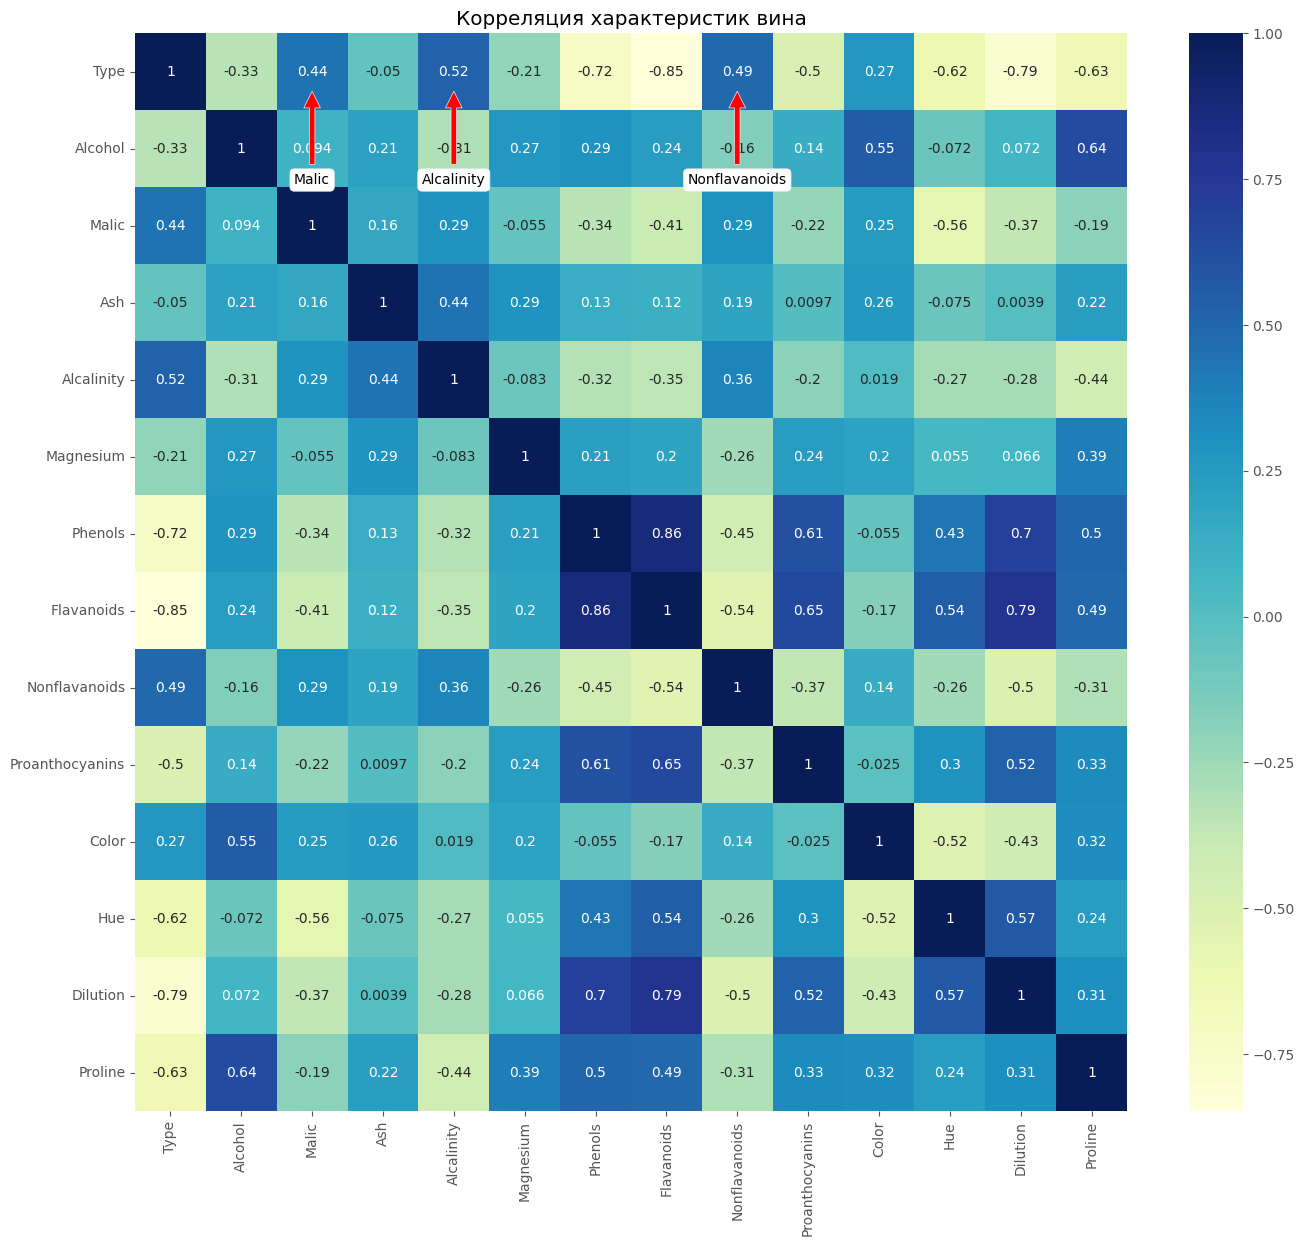

In [87]:
# три переменные больше всего коррелируют с типом вина
corr = df.corr()['Type'].sort_values(ascending=False)[1:4].index

# Построение графика
plt.figure(figsize=(16, 14))
sns.heatmap(df.corr(), annot=True, fmt=".2g", cmap='YlGnBu')

bbox = dict(boxstyle ="round", fc ="1") 
for i, el in enumerate(df.corr()):
    if el in corr:
        plt.annotate(f'{el}', 
                    xy=(i + 0.5, 0.7), 
                    xytext=(i + 0.5, 2),
                    bbox = bbox,
                    arrowprops=dict(facecolor='red', shrink=0.05),
                    ha='center', va='bottom')

plt.title('Корреляция характеристик вина')
plt.show()

#### Задание 3. Сохранение доли объясненной дисперсии в зависимости от n_components (2 балла)
Воспользуйтесь методом понижения размерности PCA с разным параметром n_components — от 1 до 10. Постройте линейный график совокупной объясненной дисперсии при добавлении каждой новой компоненты.

На том же полотне постройте столбчатую диаграмму: каждый столбец должен показывать, сколько объясненной дисперсии вносит каждая следующая компонента.

Подсказка: аналогичный пример мы разбирали на семинарском занятии.

Критерии оценивания:
Линейный график совокупной объясненной дисперсии — 1 балл.
Столбчатая диаграмма показывает вклад каждой компоненты — 1 балл.

#### Задание 4. Сравнение результатов работы разных алгоритмов понижения размерности (3 балла)
Воспользуйтесь четырьмя любыми алгоритмами понижения размерности (n_components возьмите равным 2 или 3).

Создайте поле с двумерными или трехмерными графиками, на которых будут отображены результаты работы каждого алгоритма, а цветом будет обозначен тип вина (наша зависимая переменная).

Визуально оцените графики и сделайте вывод о том, какой метод отработал лучше.

Опишите результаты и качественно обоснуйте ваш выбор лучшего алгоритма. Если невозможно выбрать лучший алгоритм, также обоснуйте почему.

Критерии оценивания:
Выбранные графики адекватно отражают результаты работы алгоритма — 1 балл.
Описание результатов работы алгоритмов опирается на данные графиков — 1 балл.
Вывод о лучшем алгоритме обоснован — 1 балл.

#### Задание 5. Сравнение результатов работы алгоритмов (4 балла)
Разделите выборку на обучающую и тестовую.

Используйте два метода понижения размерности, которые лучше всего показали себя в предыдущем задании, а также исходные данные без понижения размерности.

Примените 6 любых алгоритмов классификации на этих трех типах данных.

Постройте два sns.heatmap() (для train и test). В каждом из них должно быть по 18 ячеек (6 алгоритмов х 3 вида данных) — в каждой ячейке должно быть указано значение Accuracy для определенного алгоритма с определенными данными. Аналогичную работу мы проделывали на семинаре.

Определите, какой алгоритм дал лучшие результаты и дайте письменное обоснование своего решения:

Как алгоритмы отрабатывают при работе на данных без понижения размерности?
В чем разница в полученных значениях?
Критерии оценивания:
Эксперимент поставлен корректно — 1 балл.
Тепловая карта построена корректно — 1 балл.
Построенные графики визуализируют необходимые зависимости — 1 балл.
Письменное обоснование выбора проведено корректно: не содержит логических ошибок, предположения обоснованны и опираются на данные графиков — 1 балл.

#### Задание 6. Более пристальный анализ (2 балла)
Для лучшего алгоритма из предыдущего задания постройте Classification Report, Confusion Matrix, Precision Recall Curve, ROC Curve.

Удалось ли обнаружить какие-то аномалии в работе нашего алгоритма? Можем ли мы принять полученные результаты?

Критерии оценивания:
По одному баллу за обоснованный ответ на каждый вопрос.